# Deep learning framework example: MNIST dataset

This notebook demonstrates how to use the deeplearning API to train and test the model on the [MNIST dataset](http://yann.lecun.com/exdb/mnist/).  This dataset contains hand written digits and their labels.


**Important**: Please see the Iris notebook example first, as it contains more explaination of how the framework is used.  The purpose of this notebook is to run the MNIST dataset and visualize the results.

In [1]:
import sys
import logging
from zensols.config import ExtendedInterpolationEnvConfig as AppConfig
from zensols.config import ImportConfigFactory
from zensols.deeplearn.result import ModelResultGrapher
from zensols.deeplearn import TorchConfig

# set up notebook environment
app_root_dir = '..'
sys.path.append(app_root_dir + '/src/python')
sys.path.append(app_root_dir + '/test/python')

# configure logging
logging.basicConfig(format='%(asctime)-15s %(name)s [%(levelname)s]: %(message)s',
                    level=logging.WARNING)

# set the random seed so things are predictable
TorchConfig.set_random_seed()

# configure the environment
config = AppConfig(app_root_dir + '/test-resources/mnist/mnist.conf',
                   env={'app_root': app_root_dir})

## Create the model facade

Create the facade with a factory, which in turn creates the executor.  The statistics on the data set that is configured on the executor is, by default, printed to standard out.  You can set the `writer` property to `None` on the facade to disable this.

In [2]:
from zensols.deeplearn.model import ModelFacade
facade = ModelFacade(config)

## Train and test the model

This trains the model on the Iris (flower) data set and prints the results.  The PyTorch model itself is also printed.

Note that in this step, all batches are loaded and logged.  This example shows that with `cache_executor` and `cache_batches` set to `True`, batches are not reloaded.  This saves time in terms of allocating, decoding and then deallocating CPU/GPU memory, especially when tuning hyperparameters and re-running for large datasets.

In [3]:
facade.train()
default_res = facade.test('Default (Adam)')

model: Mnist
feature splits:
    split stash splits:
        train: 48000 (68.6%)
        val: 12000 (17.1%)
        test: 10000 (14.3%)
        total: 70000
    total this instance: 70000
    keys consistent: True
batch splits:
    split stash splits:
        train: 2400 (68.6%)
        val: 600 (17.1%)
        test: 500 (14.3%)
        total: 3500
    total this instance: 3500
    keys consistent: True


train: 6.869|valid: 8.924/4.872 /\: 100%|██████| 40/40 [02:44<00:00,  4.12s/it]


Name: 2: Default (Adam)
Run index: 2
Learning rate: 0.01
    train:
        started: 07/01/2020 07:51:46:598902
        ended: 07/01/2020 07:54:31:330099
        batches: 2400
        ave data points per batch: 20.0
        converged/epochs: 40/40
        ave/min loss: 6.86918/0.00000
        accuracy: 0.919 (44092/48000)
        micro: F1: 0.919, precision: 0.919, recall: 0.919
        macro: F1: 0.919, precision: 0.922, recall: 0.918
    validation:
        batches: 600
        ave data points per batch: 20.0
        converged/epochs: 7/40
        ave/min loss: 4.87190/0.00047
        accuracy: 0.945 (11336/12000)
        micro: F1: 0.945, precision: 0.945, recall: 0.945
        macro: F1: 0.944, precision: 0.945, recall: 0.944
    test:
        started: 07/01/2020 07:54:41:811637
        ended: 07/01/2020 07:54:42:017441
        batches: 500
        ave data points per batch: 20.0
        converged/epochs: 1/1
        ave/min loss: 5.33325/0.00008
        accuracy: 0.941 (9413/10000

## Switch to stochastic gradient descent from the default (adam).

For this task, the (older) stochastic gradient descent algorithm works better.

In [4]:
facade.executor.model_settings.optimizer_class_name = 'torch.optim.SGD'
desc = 'switch to SGD'

In [5]:
# train again using the new optimizer
facade.train(desc)

  0%|                                                   | 0/40 [00:00<?, ?it/s]

model: Mnist
feature splits:
    split stash splits:
        train: 48000 (68.6%)
        val: 12000 (17.1%)
        test: 10000 (14.3%)
        total: 70000
    total this instance: 70000
    keys consistent: True
batch splits:
    split stash splits:
        train: 2400 (68.6%)
        val: 600 (17.1%)
        test: 500 (14.3%)
        total: 3500
    total this instance: 3500
    keys consistent: True


train: 0.404|valid: 1.183/1.188 \/: 100%|██████| 40/40 [03:12<00:00,  4.82s/it]


mnist.model.MnistNetwork (2)

In [6]:
# rerun the test after the second training
with_sgd_res = facade.test(desc)

Name: 2: switch to SGD
Run index: 2
Learning rate: 0.01
    train:
        started: 07/01/2020 07:54:42:270628
        ended: 07/01/2020 07:57:54:951673
        batches: 2400
        ave data points per batch: 20.0
        converged/epochs: 40/40
        ave/min loss: 0.40395/0.00243
        accuracy: 0.994 (47732/48000)
        micro: F1: 0.994, precision: 0.994, recall: 0.994
        macro: F1: 0.994, precision: 0.994, recall: 0.994
    validation:
        batches: 600
        ave data points per batch: 20.0
        converged/epochs: 40/40
        ave/min loss: 1.18319/0.00177
        accuracy: 0.982 (11780/12000)
        micro: F1: 0.982, precision: 0.982, recall: 0.982
        macro: F1: 0.981, precision: 0.981, recall: 0.981
    test:
        started: 07/01/2020 07:58:07:417029
        ended: 07/01/2020 07:58:07:628412
        batches: 500
        ave data points per batch: 20.0
        converged/epochs: 1/1
        ave/min loss: 1.15868/0.00020
        accuracy: 0.982 (9820/10000

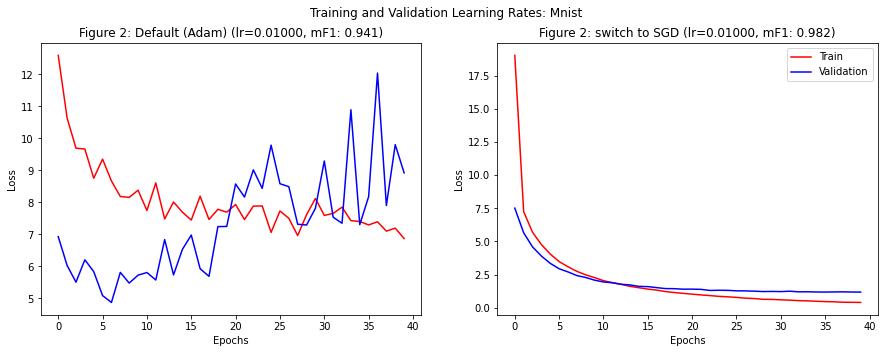

In [7]:
# plot the results
facade.get_grapher().plot([default_res, with_sgd_res])